<a href="https://colab.research.google.com/github/poojagupta14/Energy_Consumption_Prediction_Model/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import pprint
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = 'drive/MyDrive/AEP_hourly.csv' 
df = pd.read_csv(path)
df.head 

<bound method NDFrame.head of                    Datetime   AEP_MW
0       2004-12-31 01:00:00  13478.0
1       2004-12-31 02:00:00  12865.0
2       2004-12-31 03:00:00  12577.0
3       2004-12-31 04:00:00  12517.0
4       2004-12-31 05:00:00  12670.0
...                     ...      ...
121268  2018-01-01 20:00:00  21089.0
121269  2018-01-01 21:00:00  20999.0
121270  2018-01-01 22:00:00  20820.0
121271  2018-01-01 23:00:00  20415.0
121272  2018-01-02 00:00:00  19993.0

[121273 rows x 2 columns]>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [5]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [11]:
df.isnull().sum()

AEP_MW    0
Month     0
Year      0
Date      0
Time      0
Week      0
Day       0
dtype: int64

In [6]:
# To extract all data like Year, Month, Day, Time, etc.

df["Month"] = pd.to_datetime(df["Datetime"]).dt.month
df["Year"] = pd.to_datetime(df["Datetime"]).dt.year
df["Date"] = pd.to_datetime(df["Datetime"]).dt.date
df["Time"] = pd.to_datetime(df["Datetime"]).dt.time
df["Week"] = pd.to_datetime(df["Datetime"]).dt.week
df["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
df = df.set_index("Datetime")
df.index = pd.to_datetime(df.index)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday


In [7]:
df1 = df

In [8]:
# find higest & lowest energy consumption and that year
df1[df1["AEP_MW"] == df["AEP_MW"].max()]

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2008-10-20 14:00:00,25695.0,10,2008,2008-10-20,14:00:00,43,Monday


In [9]:
df1[df1["AEP_MW"] == df["AEP_MW"].min()]

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2016-10-02 05:00:00,9581.0,10,2016,2016-10-02,05:00:00,39,Sunday


We conclude that minimum energy was Consumed during 2016-10-02 at 05:00:00 and was 9581.0 MW & maximum was on 2008-10-20 at 14:00:00 and was 25695.0 MW.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Energy distribution')

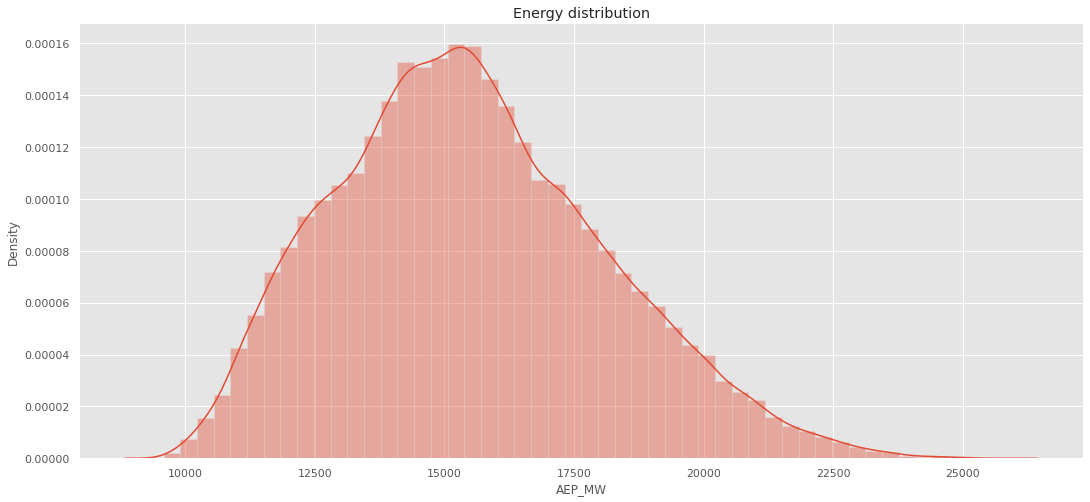

In [20]:
# plot and data visualization
sns.distplot(df1["AEP_MW"])
plt.title("Energy distribution")

In [ ]:
df1.head(2)

,Datetime,AEP_MW,New_Date,New_Time
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00


In [ ]:
# extract year
df1["Year"] = pd.DatetimeIndex(df['New_Date']).year

In [ ]:
df1.head(2)

,Datetime,AEP_MW,New_Date,New_Time,Year
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00,2004
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00,2004


In [13]:
# find unique year in the dataset 
print(df.Year.unique(),"\n")
print("Total number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total number of Unique Year 15 



In [14]:
df[df["Year"] == 2013].nunique()

AEP_MW    5601
Month       12
Year         1
Date       365
Time        24
Week        52
Day          7
dtype: int64

No handles with labels found to put in legend.


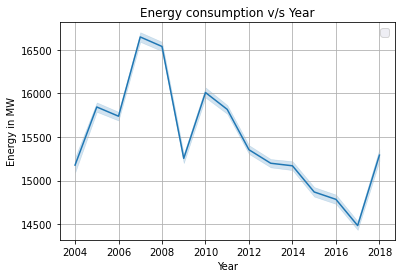

In [17]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=df["Year"], y=df["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,8)})

plt.title("Energy consumption v/s Year")
plt.xlabel("Year")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

In [18]:
df.index = pd.to_datetime(df.index)
df = df.sort_index()

No handles with labels found to put in legend.


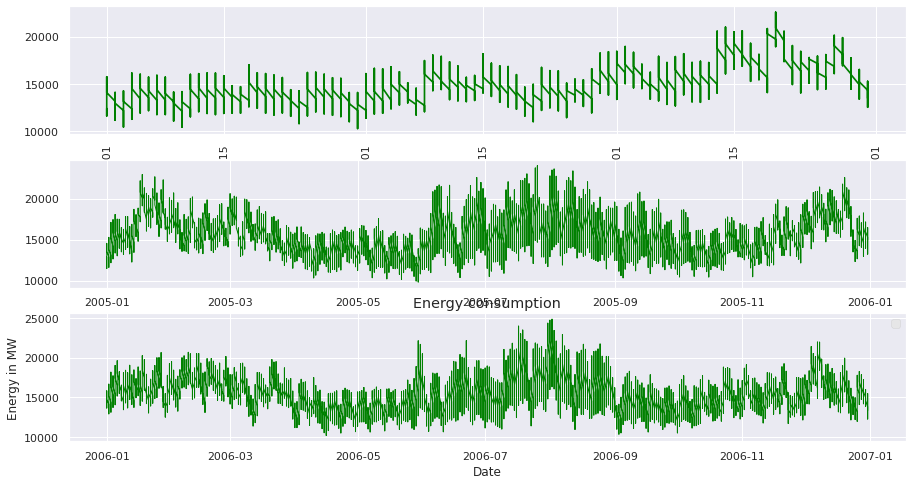

In [19]:
fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2004 = df["2004"]["AEP_MW"].to_list()
x_2004 = df["2004"]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth=1.7)


y_2005 = df["2005"]["AEP_MW"].to_list()
x_2005 = df["2005"]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="green", linewidth=1)


y_2006 = df["2006"]["AEP_MW"].to_list()
x_2006 = df["2006"]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumption")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [21]:
pd.plotting.register_matplotlib_converters()

No handles with labels found to put in legend.


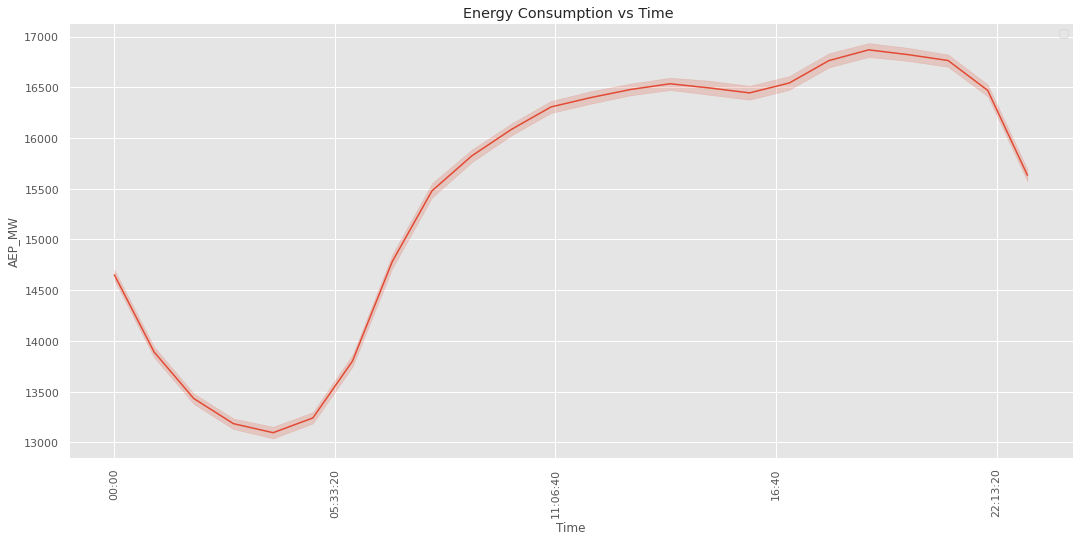

In [22]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=df["Time"],y=df["AEP_MW"], data=df)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

Regression

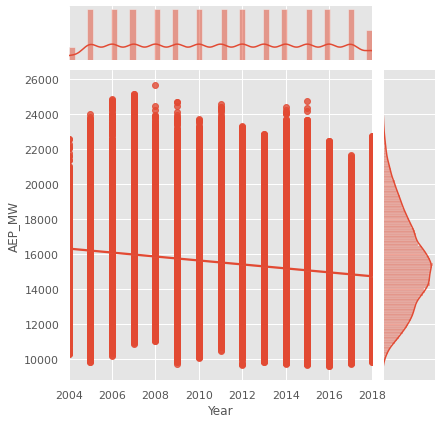

In [24]:
# regression
sns.jointplot(x=df1["Year"], y=df1["AEP_MW"], data=df, kind="reg")

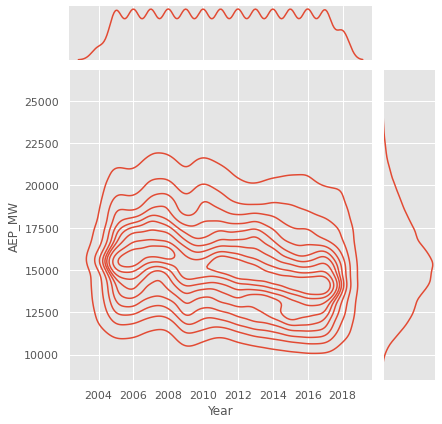

In [25]:
sns.jointplot(x=df["Year"], y=df["AEP_MW"], data=df, kind="kde")